# **Teste Prático de Data Science | Rocketmat**
#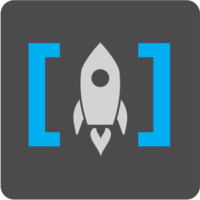

##Informações do Desenvolvedor

*   Nome: Igor Cleto Silva de Araújo
*   Contato: (31) 982856546 | igorcleto@outlook.com
*   LinkedIn: https://www.linkedin.com/in/igorcleto/ 
*   GitHub: https://github.com/cletoigor

##Informações do Dataset



https://www.kaggle.com/krismurphy01/data-lab

##Importação de Bibliotecas

In [216]:
#pandas
import pandas as pd

#matplotlib
%matplotlib inline
%pylab inline
plt.style.use('ggplot')
import matplotlib.pyplot as plt

#numpy
import numpy as np

#seaborn
import seaborn as sns

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


##Análise Exploratória do Dataset

####Desafio 01:
1. Faça uma análise do dataset e nos explique quais as principais informações e como
elas se relacionam. Nesta análise deixe bem claro quais as suas expectativas e
quais as conclusões em cada passo da análise.

*   Incialmente é necessário conhecer **O QUE SÃO** os dados que estamos querendo trabalhar e **COMO** eles estão distribuídos;
*   Para isso utilizamos a lib Pandas;
*   A partir dessas informações é possível saber **"onde estamos pisando"** para dar os próximos passos e entendermos aonde podemos chegar.

#####Introdução da Análise Exploratória

In [61]:
#Captação do csv através do Pandas e exploração inicial do conteúdo presente na base de dados:'
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Desafio ROCKETMAT/Database/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

#Quais colunas temos disponíveis?
df.columns

Index(['ID', 'Name', 'Department', 'GEO', 'Role', 'Rising_Star',
       'Will_Relocate', 'Critical', 'Trending Perf', 'Talent_Level',
       'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1',
       'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4',
       'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2',
       'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5',
       'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3',
       'EMP_Engagement_4', 'EMP_Engagement_5', 'last_evaluation',
       'number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'left_Company', 'CSR Factor', 'promotion_last_5years',
       'sales', 'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Work_Status2',
       'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5',
       'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave',
       'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2',
       'Emp_Competitive_3',

In [62]:
#Amostra dos 5 primeiros dados:
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [63]:
#Amostra dos 5 últimos dados:
df.tail()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
14994,14995,EARLY,Operations,Korea,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,252,5,0,1,NaN,0,technical,medium,F,1,1,2,2,2,2,1,2,1,1.0,NaN,1,1,2,3,2,4,2,2,3,1,1538,88,9
14995,14996,LUNSFORD,Sales,Australia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,232,5,0,1,NaN,0,technical,medium,F,6,1,1,2,4,1,2,2,1,1.0,NaN,1,5,1,4,4,3,1,4,5,5,1247,89,4
14996,14997,GOLDSMITH,Finance,China,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,242,5,0,1,NaN,0,sales,low,F,4,4,3,1,5,1,1,2,1,1.0,NaN,2,2,1,2,4,4,2,3,4,5,1155,88,2
14997,14998,FLOOD,Human Resources,US,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,223,6,0,1,NaN,0,accounting,medium,M,2,2,2,3,2,1,2,1,1,NaN,1.0,1,1,2,1,5,2,1,3,5,1,1210,86,5
14998,14999,Yolo,IT,Colombia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,2,155,5,0,1,NaN,0,sales,low,F,6,5,2,4,1,2,2,2,1,0.0,NaN,1,3,1,1,5,2,1,5,3,1,1639,86,4


In [64]:
#Quantidade de Funcionários x Características disponívieis
df.shape

(14999, 62)

In [65]:
#Quantidade de dados nulos por colunas
df.isnull().sum()

ID                                       0
Name                                     2
Department                               0
GEO                                      0
Role                                     0
                                        ..
Emp_Collaborative_4                      0
Emp_Collaborative_5                      0
Sensor_StepCount                         0
Sensor_Heartbeat(Average/Min)            0
Sensor_Proximity(1-highest/10-lowest)    0
Length: 62, dtype: int64

Através dos métodos utilizados acima já sabemos as características básicas do nosso dataset e respondemos algumas perguntas:

*   **Possuímos um número relevante de informações nulas?**
  * Não, o dataset encontra-se praticamente completo.
*   **A base de dados contém informações de quantos funcionários?** 
  * 15 mil funcionários.

*   **As características dizem respeito a aspectos como:**
    *   Região da empresa que o funcionário está localizado
    *   Divisão de trabalho Remoto x Presencial
    *   Percepção dos líderes de equipe em relação ao seus funcionários
    *   Percepção do funcionário em relação a si mesmo na empresa e sua carreira
    *   Percepção de terceiros em relação aos funcionários
    *   O que o RH da empresa pode melhorar e o que já está dando certo?
    *   % de mulheres em relação aos homens presentes na empresa


Entendido **DO QUE SE TRATA** e **COMO** está disposto os dados que possuímos, podemos tentar entender correlações entre estes dados para responder algumas perguntas relevantes ao RH e aos tomadores de decisão da empresa.


Possíveis Insights a partir do correlacionamento de dados:


*   Dos funcionários que trabalham na empresa qual o % de homens e o % de mulheres?
*   Qual a região com a maior quantidade de funcionários?
*   Qual o % de funcionários que estão almejando recolocação?
*   Dos que estão almejando recolocação, qual a região com mais funcionários nesta condição?
*   Dos que estão almejando recolocação, a maioria é homem ou mulher?
*   Dos que estão almejando recolocação, algum sofreu acidente no trabalho? 
*   Qual o país mais afetado com os funcionários que deixaram a empresa?
*   Dos profissionais que deixaram a empresa, qual % trabalhava remotamente?


#####Dos funcionários que trabalham na empresa qual o % de homens e o % de mulheres?

In [66]:
#respondendo a pergunta "Dos funcionários que trabalham na empresa qual o % de homens e o % de mulheres?"
df['left_Company'].value_counts()

0    11428
1     3571
Name: left_Company, dtype: int64

In [67]:
#removendo funcionários que já saíram da empresa
df_Presentes = df[(df['left_Company'])==0]
print(df_Presentes['left_Company'].value_counts())

0    11428
Name: left_Company, dtype: int64


In [68]:
df_Presentes.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [69]:
#Identificando o Nº de homens e mulheres
df_Presentes['Gender'].value_counts()

F    5756
M    5672
Name: Gender, dtype: int64

In [70]:
#Realizando a soma dos valores 'Female's e 'Male's na base de dados:

mulheres_Presentes = df_Presentes[(df_Presentes['Gender']=='F')]
count_mulheres_Presentes = mulheres_Presentes.shape[0]

homens_Presentes = df_Presentes[(df_Presentes['Gender']=='M')]
count_homens_Presentes = homens_Presentes.shape[0]

In [71]:
count_mulheres_Presentes

5756

In [72]:
count_homens_Presentes

5672

<Figure size 7200x3600 with 0 Axes>

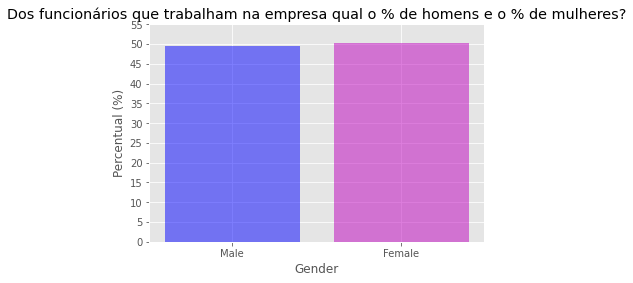

<Figure size 7200x3600 with 0 Axes>

In [73]:
#Somatório de todos os gêneros e cálculo da %:
total_Gender = df_Presentes['Gender'].value_counts().sum()
percent_Gender = [((count_homens_Presentes)/total_Gender)*100,((count_mulheres_Presentes)/total_Gender)*100]

#Dicionário com os parâmetros para visualização gráfica:
data = {'Male': percent_Gender[0],'Female':percent_Gender[1]}
gender = list(data.keys())
values = list(data.values())

#Configurações do gráfico:
male_bar = plt.bar(gender[0], values[0], alpha=0.5,color='b', label='Male')
female_bar = plt.bar(gender[1], values[1], alpha=0.5,color='m', label='Female')

plt.title('Dos funcionários que trabalham na empresa qual o % de homens e o % de mulheres?')
plt.ylabel('Percentual (%)')
plt.xlabel('Gender')
plt.yticks(np.arange(0,60,5))
plt.figure(figsize=(100,50))

In [74]:
print('O % de homens é:',values[0],'\nO % de mulheres é',values[1])

O % de homens é: 49.6324816240812 
O % de mulheres é 50.3675183759188


#####Qual a região com a maior quantidade de funcionários?

In [75]:
#respondendo a pergunta "Qual a região com a maior quantidade de funcionários?"

#Verificando quais as regiões existentes e somando a quantidade de vezes que cada região aparece na base de dados:
print(df['GEO'].value_counts())
print(df['GEO'].value_counts().max())

print('A região com a maior quantidade de funcionários é UK com',df['GEO'].value_counts().max(),'funcionários.')

UK           1772
France       1699
Korea        1685
Japan        1669
China        1667
Colombia     1659
Turkey       1639
US           1632
Australia    1577
Name: GEO, dtype: int64
1772
A região com a maior quantidade de funcionários é UK com 1772 funcionários.


#####Qual o % de funcionários que estão almejando recolocação?

In [76]:
#respondendo a pergunta "Qual o % de funcionários que estão almejando recolocação?"

#Verificando os valores existentes e a quantidade de vezes que cada valor aparece na base de dados:
print(df_Presentes['Will_Relocate'].value_counts())

#Extraindo a quantidade de funcionários que busca recolocação
recolocacao_Presentes = df_Presentes[(df_Presentes['Will_Relocate']==1)]
count_recolocacao_Presentes = recolocacao_Presentes.shape[0]
print(count_recolocacao_Presentes)

#Somatório de todos os funcionários em busca de recolocação e cálculo da %:
total_Recolocacao = df_Presentes['Will_Relocate'].value_counts().sum()
percent_Recolocacao = [((count_recolocacao_Presentes)/total_Recolocacao)*100,(100 - ((count_recolocacao_Presentes)/total_Recolocacao)*100)]

print(percent_Recolocacao[0],percent_Recolocacao[1])


1    5741
0    5687
Name: Will_Relocate, dtype: int64
5741
50.23626181309066 49.76373818690934


<Figure size 7200x3600 with 0 Axes>

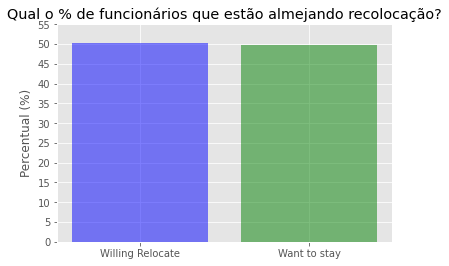

<Figure size 7200x3600 with 0 Axes>

In [77]:
#Dicionário com os parâmetros para visualização gráfica:
data = {'Willing Relocate': percent_Recolocacao[0],'Want to stay':percent_Recolocacao[1]}
name = list(data.keys())
values = list(data.values())

#Configurações do gráfico:
relocate_bar = plt.bar(name[0], values[0], alpha=0.5,color='b', label='Willing Relocate')
stay_bar = plt.bar(name[1], values[1], alpha=0.5,color='g', label='Want to stay')

plt.title('Qual o % de funcionários que estão almejando recolocação?')
plt.ylabel('Percentual (%)')
plt.yticks(np.arange(0,60,5))
plt.figure(figsize=(100,50))

In [78]:
print('O % de funcionários buscando recolocação é:',values[0],'\nO % de funcionários que não estão buscando é',values[1])

O % de funcionários buscando recolocação é: 50.23626181309066 
O % de funcionários que não estão buscando é 49.76373818690934


#####Dos que estão almejando recolocação, qual a região com mais funcionários nesta condição?

In [79]:
#respondendo a pergunta "Dos que estão almejando recolocação, qual a região com mais funcionários nesta condição?"

#Verificando quais as regiões existentes e somando a quantidade de vezes que cada região aparece na base de dados:
(recolocacao_Presentes['GEO'].value_counts())
print('A região com a maior quantidade de funcionários almejando recolocação é UK com',recolocacao_Presentes['GEO'].value_counts().max(),'funcionários.')

A região com a maior quantidade de funcionários almejando recolocação é UK com 689 funcionários.


#####Dos que estão almejando recolocação, a maioria é homem ou mulher?

In [80]:
#Verificando a quantidade de profissionais em busca de recolocação por gênero:
recolocacao_Presentes['Gender'].value_counts()

F    2883
M    2858
Name: Gender, dtype: int64

In [81]:
#Realizando o somatório da quantidade de mulheres e homens em busca de recolocação:
recolocacao_mulheres_Presentes = recolocacao_Presentes[(recolocacao_Presentes['Gender']=='F')]
count_recolocacao_mulheres_Presentes = recolocacao_mulheres_Presentes.shape[0]

recolocacao_homens_Presentes = recolocacao_Presentes[(recolocacao_Presentes['Gender']=='M')]
count_recolocacao_homens_Presentes = recolocacao_homens_Presentes.shape[0]


print('Dos que estão almejando recolocação',count_recolocacao_mulheres_Presentes,'são mulheres e',count_recolocacao_homens_Presentes,'são homens')

Dos que estão almejando recolocação 2883 são mulheres e 2858 são homens


#####Dos que estão almejando recolocação, algum sofreu acidente no trabalho?

In [82]:
#Identificando o número de profissionais em busca de recolocação que sofreram ou não acidente de trabalho:
print(recolocacao_Presentes['Work_accident'].value_counts())

#Realizando a divisão entre os que sofreram e não sofreram aciente de trabalho
recolocacao_acidente_Presentes = recolocacao_Presentes[(recolocacao_Presentes['Work_accident']==1)]
count_recolocacao_acidente_Presentes = recolocacao_acidente_Presentes.shape[0]

recolocacao_sem_acidente_Presentes = recolocacao_Presentes[(recolocacao_Presentes['Work_accident']==0)]
count_recolocacao_sem_acidente_Presentes = recolocacao_sem_acidente_Presentes.shape[0]



0    4730
1    1011
Name: Work_accident, dtype: int64


In [83]:
print('Dos profissionais que estão buscando recolocação profissional',count_recolocacao_acidente_Presentes,'sofreram acidente e',count_recolocacao_sem_acidente_Presentes,'não sofreram acidente')

Dos profissionais que estão buscando recolocação profissional 1011 sofreram acidente e 4730 não sofreram acidente


#####Qual o país mais afetado com os funcionários que deixaram a empresa?

In [84]:
#Capturando faixa de profissionais que deixaram a empresa:
df_Ausentes = df[(df['left_Company'])==1]

#Verificando os países que se encontram os profissionais ausentes e a quantidade por país:
print(df_Ausentes['GEO'].value_counts())
print(df_Ausentes['GEO'].value_counts().max())


UK           435
Colombia     408
China        403
France       403
Japan        400
Turkey       395
US           393
Korea        385
Australia    349
Name: GEO, dtype: int64
435


In [85]:
print('O país mais afetado com os funcionários que deixaram a empresa é o Uk com',df_Ausentes['GEO'].value_counts().max(),'profissionais.')

O país mais afetado com os funcionários que deixaram a empresa é o Uk com 435 profissionais.


#####Dos profissionais que deixaram a empresa, qual % trabalhava remotamente?

In [86]:
#Verificando os níveis de trabalho remoto e a quantidade de funcionários em cada nível
print(df_Ausentes['Percent_Remote'].value_counts())

0.8    1894
0.4    1641
0.5      24
1.0      12
Name: Percent_Remote, dtype: int64


In [87]:
total_Remote = df_Ausentes['Percent_Remote'].value_counts().sum()

#Capturando a quantidade de funcionários de cada percentual:
oitenta_remote_Ausentes = df_Ausentes[(df_Ausentes['Percent_Remote']==0.8)]
count_oitenta_remote_Ausentes = oitenta_remote_Ausentes.shape[0]

quarenta_remote_Ausentes = df_Ausentes[(df_Ausentes['Percent_Remote']==0.4)]
count_quarenta_remote_Ausentes = quarenta_remote_Ausentes.shape[0]

cinquenta_remote_Ausentes = df_Ausentes[(df_Ausentes['Percent_Remote']==0.5)]
count_cinquenta_remote_Ausentes = cinquenta_remote_Ausentes.shape[0]

cem_remote_Ausentes = df_Ausentes[(df_Ausentes['Percent_Remote']==1.0)]
count_cem_remote_Ausentes = cem_remote_Ausentes.shape[0]

#Realizando a verificação:
print(count_oitenta_remote_Ausentes)
print(count_quarenta_remote_Ausentes)
print(count_cinquenta_remote_Ausentes)
print(count_cem_remote_Ausentes)

1894
1641
24
12


<Figure size 7200x3600 with 0 Axes>

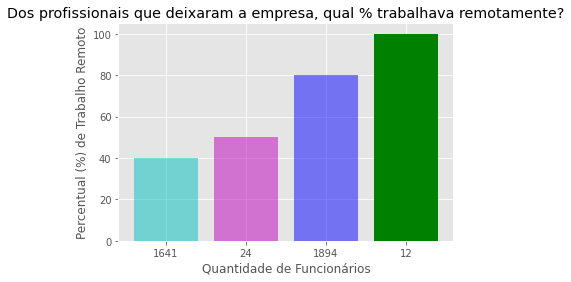

<Figure size 7200x3600 with 0 Axes>

In [101]:
#Criando o gráfico para verificação das porcentagens:

quarenta_bar = plt.bar(str(count_quarenta_remote_Ausentes), 40, alpha=0.5,color='c', label='40%')
cinquenta_bar = plt.bar(str(count_cinquenta_remote_Ausentes), 50, alpha=0.5,color='m', label='50%')
oitenta_bar = plt.bar(str(count_oitenta_remote_Ausentes), 80, alpha=0.5,color='b', label='80%')
cem_bar = plt.bar(str(count_cem_remote_Ausentes), 100,color='g', label='100%')

plt.title('Dos profissionais que deixaram a empresa, qual % trabalhava remotamente?')
plt.ylabel('Percentual (%) de Trabalho Remoto')
plt.xlabel('Quantidade de Funcionários')
plt.figure(figsize=(100,50))

##Aplicações de Machine Learning

####Desafio 02:
2. Enumere possíveis problemas que poderíamos resolver utilizando machine learning
neste dataset. Construa um ou mais modelos e nos mostre suas habilidades de
modelar um problema: decidindo features, labels e realizando uma experimentação.


Um dos grandes desafios das empresas na fase atual é a **Retenção de Talentos**. O salário do funcionário, em dinheiro, como o termo "salário" é amplamente conhecido, muitas vezes não é sufuciente para reter o funcionário na empresa. Termos como "salário emocional" estão sendo utilizados atualmente para entender o que **move** um funcionário além de sua remuneração na conta bancária.
Visto a disponibildade de features disponíveis no dataset, conseguimos ressponder perguntas como:

1.   Quais funcionários irão sair da empresa no futuro?
2.   Qual funcionário será um grande talento no futuro?
3.   Caso eu tenha um novo candidato ele será um talento no futuro? 



######Quais funcionários irão sair da empresa no futuro?



*   Um dos tipos de aprendizado que existe em Machine Learning é o *Aprendizado Supervisionado*.
*   A aprendizagem supervisionada é divida entre algoritmos de Regressão e Classificação. Utilizamos regressão para previsão de valores contínuos e classificação para previsão de valores discretos. Como no caso temos apenas uma resposta binária (Irá sair da empresa OU Irá ficar na empresa), utilizaremos algoritmos de Classificação.


######Random Forest

In [109]:
#Definindo o meu "Y":

y = df['left_Company']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left_Company, Length: 14999, dtype: int64


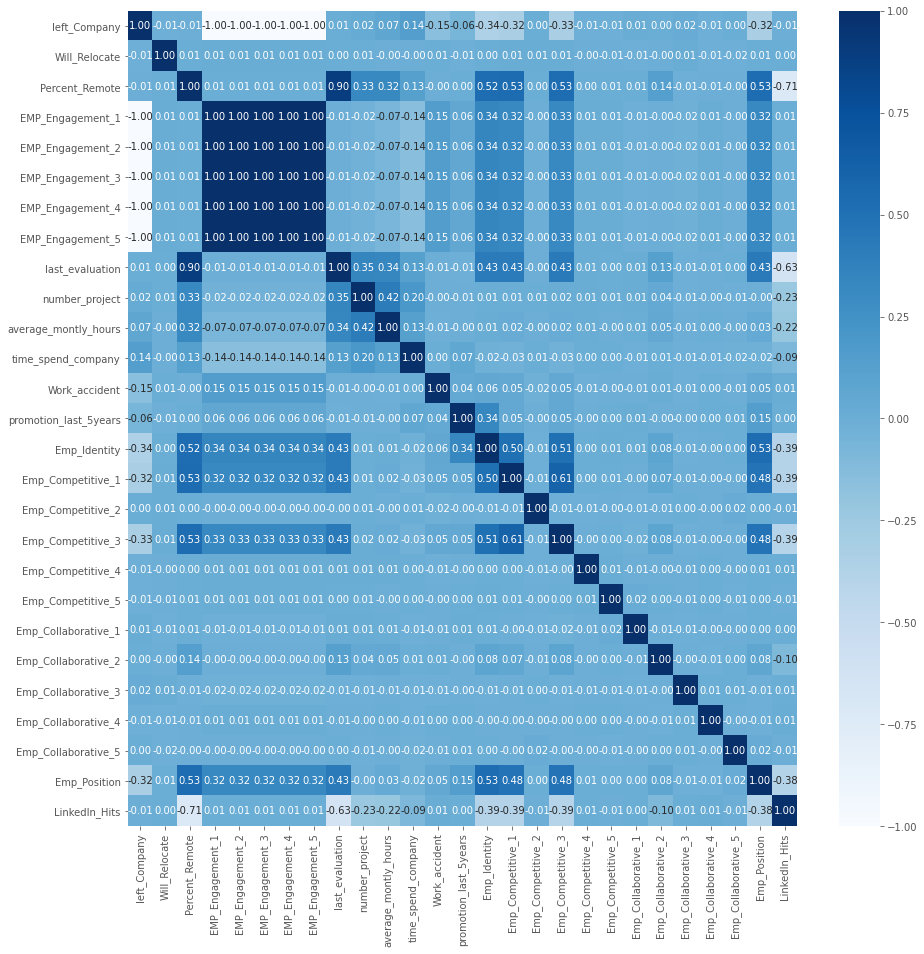

In [174]:
#Escolhendo minhas features (meus X's):

#Entendendo a correlação entre as variáveis:
#Irei escolher baseado em uma hipótese e verificar com os dados
hipotese_Features = ['left_Company','Will_Relocate','Percent_Remote',
                     'EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3','EMP_Engagement_4','EMP_Engagement_5',
                     'last_evaluation','number_project','average_montly_hours',
                     'time_spend_company','Work_accident','promotion_last_5years',
                     'Emp_Identity','Emp_Competitive_1','Emp_Competitive_2','Emp_Competitive_3','Emp_Competitive_4','Emp_Competitive_5',
                     'Emp_Collaborative_1','Emp_Collaborative_2','Emp_Collaborative_3','Emp_Collaborative_4','Emp_Collaborative_5',
                     'Emp_Position','LinkedIn_Hits']
plt.figure(figsize=(15, 15))
sns.heatmap(df[hipotese_Features].corr(),annot = True,fmt = '.2f',cmap='Blues')

A partir do Heatmap de correlações conseguimos verificar uma correlação negativa perfeita entre as features 'left_Company' (funcionários que deixaram a empresa)e as pesquisas de engajamento do funcionário com a empresa feitas e registradas pelas features 'EMP_Engagement'.

Outras features que possuem uma correlação negativa interessante são 'Emp_Position' (como o funcionário identfica a importancia do seu cargo na empresa, e 'Emp_Identifity' (Quão o empregado se identifica com a empresa).'

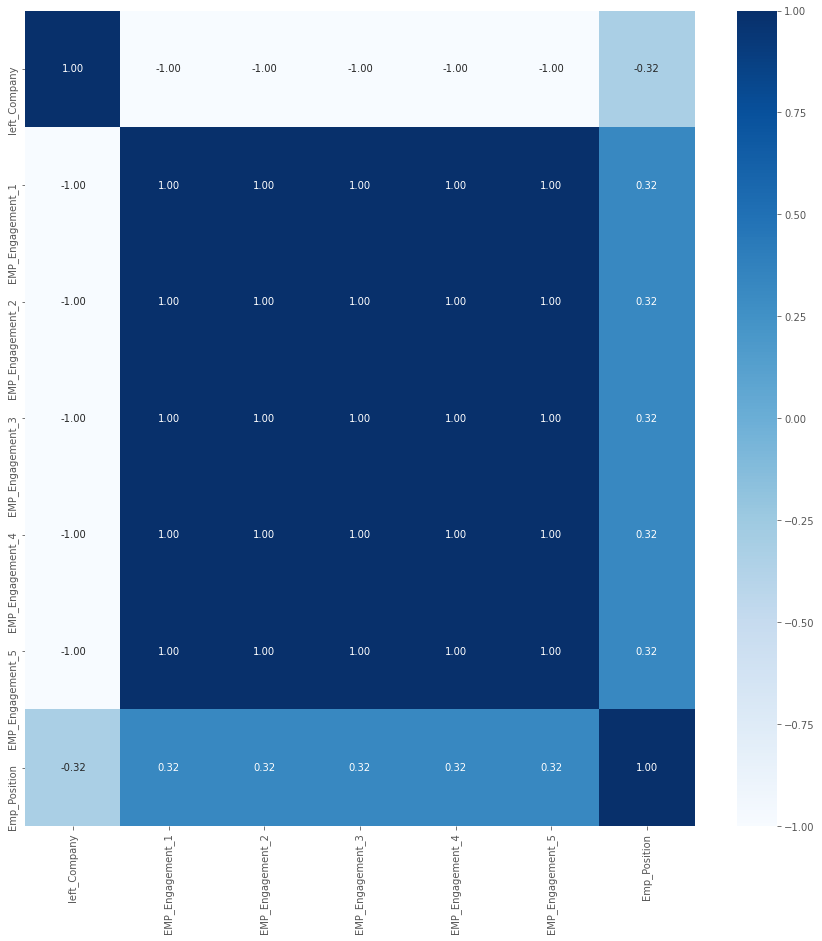

In [240]:
#Refazendo o HeatMap com as características selecionadas:

hipotese_Features = ['left_Company',
                     'EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3','EMP_Engagement_4','EMP_Engagement_5',
                     'Emp_Position']
plt.figure(figsize=(15, 15))
sns.heatmap(df[hipotese_Features].corr(),annot = True,fmt = '.2f',cmap='Blues')

In [236]:
#Salvando as features escolhidas em X e retirando o Y desejado

features = ['Emp_Position','EMP_Engagement_1']
X = df[features]

In [173]:
df.tail()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
14994,14995,EARLY,Operations,Korea,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,252,5,0,1,NaN,0,technical,medium,F,1,1,2,2,2,2,1,2,1,1.0,NaN,1,1,2,3,2,4,2,2,3,1,1538,88,9
14995,14996,LUNSFORD,Sales,Australia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,4,232,5,0,1,NaN,0,technical,medium,F,6,1,1,2,4,1,2,2,1,1.0,NaN,1,5,1,4,4,3,1,4,5,5,1247,89,4
14996,14997,GOLDSMITH,Finance,China,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,242,5,0,1,NaN,0,sales,low,F,4,4,3,1,5,1,1,2,1,1.0,NaN,2,2,1,2,4,4,2,3,4,5,1155,88,2
14997,14998,FLOOD,Human Resources,US,Level 2-4,NaN,0,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,5,223,6,0,1,NaN,0,accounting,medium,M,2,2,2,3,2,1,2,1,1,NaN,1.0,1,1,2,1,5,2,1,3,5,1,1210,86,5
14998,14999,Yolo,IT,Colombia,Level 2-4,NaN,1,NaN,3,6,6,1.0,NaN,NaN,NaN,NaN,NaN,5,5,4,5,4,1,2,3,2,1,1.0,2,155,5,0,1,NaN,0,sales,low,F,6,5,2,4,1,2,2,2,1,0.0,NaN,1,3,1,1,5,2,1,5,3,1,1639,86,4


In [239]:
#Criando o modelo de Machine Learning

#É necessário dividir nossos dados em dois grupos antes de prosseguirmos: Treino e Teste
#Esta etapa consiste na validação do modelo com dados que possuem a resposta desejada conhecida (pessoas que já saíram da empresa) para posteriormente testar com dados que não possuímos a resposta
#Ou seja, profissionais que ainda não deixaram a empresa

#Seperando os dados entre treino e teste
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#Criação do modelo de Classificação
model = RandomForestClassifier(n_estimators=10,random_state=30)
#Treino do modelo de Classificação
model.fit(train_X,train_y)

#Teste da predição
prediction = model.predict(val_X)
print(prediction)
print(prediction.shape)

print("Acurácia = ",metrics.accuracy_score(val_y,prediction))

[0 1 0 ... 0 1 0]
(3750,)
Acurácia =  1.0


Verificamos neste caso, um exemplo de *OVERFITTING*, pois todos os funcionários que saíram previamente da empresa, avaliaram uma nota ruim nos campos Employee Engagement (Como o funcionário se sente a respeito do seu engajamento com a empresa).

Portanto, irei refazer o modelo com novas features que possuem menor correlação.

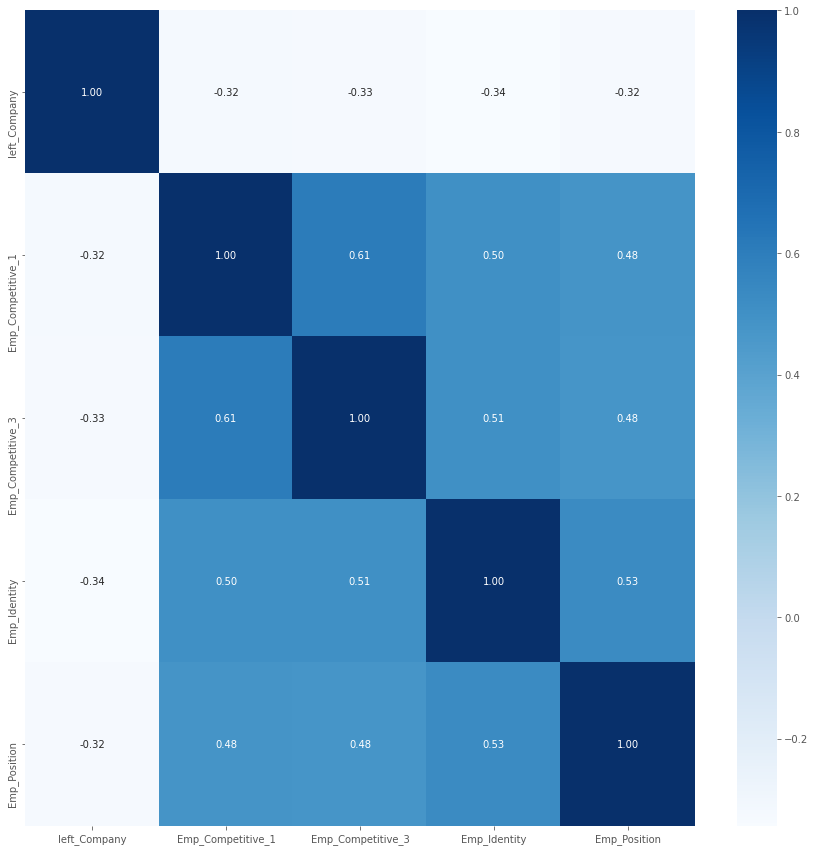

In [243]:
hipotese_Features = ['left_Company',
                     'Emp_Competitive_1','Emp_Competitive_3',
                     'Emp_Identity','Emp_Position']
plt.figure(figsize=(15, 15))
sns.heatmap(df[hipotese_Features].corr(),annot = True,fmt = '.2f',cmap='Blues')

In [244]:
features = ['Emp_Competitive_1','Emp_Competitive_3',
            'Emp_Identity','Emp_Position']
X = df[features]

In [246]:
#Seperando os dados entre treino e teste
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#Criação do modelo de Classificação
model = RandomForestClassifier(n_estimators=10,random_state=30)
#Treino do modelo de Classificação
model.fit(train_X,train_y)

#Teste da predição
prediction = model.predict(val_X)
print(prediction)
print(prediction.shape)

print("Acurácia = ",metrics.accuracy_score(val_y,prediction))

[0 0 0 ... 0 0 0]
(3750,)
Acurácia =  0.7594666666666666


Vemos agora uma acurácia de 76% de acerto para os dados de validação.

###BÔNUS

Dos modelos que você criou é possível fazer alguma análise de interpretação do modelo?
Tente encontrar qual o impacto das features no modelo, quais as mais importantes e como
elas podem ser interpretadas.

Resposta:

Como demonstrado anteriormente, o primeiro é entender qual o problema que está sendo resolvido com Machine Learning e entender qual o melhor tipo de aprendizagem e modelo resolve este determinado problema.



1.   Entendendo a pergunta: "Quais funcionários irão sair da empresa no futuro?
*    Em nosso dataset observamos uma feature chamada left_Company (saiu da empresa) e elá possui uma característica *discreta*, ou seja, apenas valores booleanos ou binários e não um comportamento e variação no tempo.
Desta maneira devemos seguir o caminho da CLASSIFICAÇÃO do funcionário entre 0 e 1.

2.   Escolha das Features:
*    Como demonstrado anteriormente a escolha das features foi feita a partir da checagem da CORRELAÇÃO LINEAR. A correlação consiste em verificar o que de fato influencia ou não a saída da empresa do funcionário e o dataset nos fornece uma série de características.
*    O mapa de calor é uma ótima visualização fácil e rápida de correlação entre features.

3.   Escolha do Modelo:
*    Existem vários modelos disponíveis para resolver problemas de classificação. O modelo utilizado Random Forest Classifier consiste na utilização de várias árvores de decisão juntas (por isso forest, em português floresta).

4.  Resultados do Modelo:
*    Verificamos que a acurácia do primeiro teste, utilizando as features de correlação total negativa (-1) foi de 100% o que caracterizou um OVERFITTING. Overfitting em Machine Learning diz respeito a "excesso de treinamento" do modelo, significa que ele apenas consegue entender aquele dado e a partir disso promover respostas incorretas para novos dados.
*    Podemos encarar as features de correlação -1 como redundantes em relação à saída desejada (feature left_Company).
*   Para o segundo teste obtive um resultado de 75% com features não redundantes que fazem sentido ao observar o significado dos valores de cada característica. Profissionais insatisfeitos com a forma que enxergam a empresa e si próprios nela.

